# re — Regular expression operations


In [1]:
from IPython.display import display, Markdown
display(Markdown("[Librería re de Python](https://docs.python.org/3/library/re.html)"))

[Librería re de Python](https://docs.python.org/3/library/re.html)

In [2]:
import re

# Los métodos compile y match


Evita la repetición de código y se usa para crear un programa de regex y permite el uso de métodos integrados. El método match chequea si un patrón coincide con una cadena o secuencia.

In [3]:
cadena='Python'
patron= "Cali"
prog=re.compile(patron)
prog.match(cadena)

In [4]:
cadena1='cali'
prog=re.compile(patron)
if prog.match(cadena1) !=None:
    print("coinciden")
else:
    print("No coinciden")

No coinciden


# Matching posicional

Adicionando parámetros podemos usar  el método match para posicionar una  cadena. La primera posición inicia en 0. El span(x,y) devuelve una tupla que contiene las posiciones (inicio, final) del match.

In [5]:
prog=re.compile('y')
prog.match('Python',pos=1)

<re.Match object; span=(1, 2), match='y'>

In [6]:
prog=re.compile('thon')
prog.match('xxPythonicxyy',pos=4)

<re.Match object; span=(4, 8), match='thon'>

#  \w hace match con cualquier letra, dígito o underscore(subrayado)

In [7]:
prog=re.compile(r'c\wm')
print(prog.search('camarero'))
print(prog.search('pac_man'))
print(prog.search('pac2man'))

<re.Match object; span=(0, 3), match='cam'>
<re.Match object; span=(2, 5), match='c_m'>
<re.Match object; span=(2, 5), match='c2m'>


# \W hace match con cualquier símbolo que no cubre \w,  hay otros símbolos además de letras, dígitos y el guión bajo.

In [8]:
prog=re.compile(r'9\W11')
print(prog.search('9/11 fue un terrible día'))
print(prog.search('9-11 fue un terrible día'))
print(prog.search('09/11  y 9.11 fue un terrible día'))

<re.Match object; span=(0, 4), match='9/11'>
<re.Match object; span=(0, 4), match='9-11'>
<re.Match object; span=(1, 5), match='9/11'>


# Dot (.) hace match con un sólo caracter

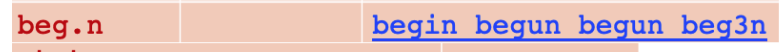

In [9]:
from IPython.display import Image
Image(filename='begin..png')

In [10]:
prog=re.compile(r'beg.')
print(prog.search('begin'))
print(prog.search('begun'))

<re.Match object; span=(0, 4), match='begi'>
<re.Match object; span=(0, 4), match='begu'>


# \d hace match con los dígitos del 0-9

In [11]:
prog=re.compile(r"score fue de \d\d\d")
print(prog.search("mi score fue de 27"))
print(prog.search("mi score fue de 239"))


None
<re.Match object; span=(3, 19), match='score fue de 239'>


# El signo de intercalación ^ hace match con patrones que comienzan una cadena y el signo $ hace match con el patrón al final del string.

In [12]:
prog=re.compile(r'^India|Rusia$')
print(prog.search('La India son excelentes Colombia'))
print(prog.search('India es un país más caliente que Rusia'))

None
<re.Match object; span=(0, 5), match='India'>


# Expresiones regulares en regex

# Match de 0 o más repeticiones de una expresión regular. Este match se realiza a nivel de subcadenas.

In [13]:
def print_match(s):
        if prog.search(s)==None:
            print("No match")
        else:
            print(s)

In [14]:
prog=re.compile(r'ab*')
print_match("a")
print_match("ab")
print_match("bbab")
print_match("b")

a
ab
bbab
No match


In [15]:
prog1=re.compile(r'baa+')
print_match("baaaa")
print_match("baa")
print_match("bbab")
print_match("b")

baaaa
baa
bbab
No match


# Control de repeticiones  

{m} especifica exactamente m copia de RE para el match. 

In [16]:
prog=re.compile(r'A{3}')
print_match('ccAAAd')


ccAAAd


# Rangos de caracteres

 Por ejemplo, a-z o A-Z coincidirá con cualquier cosa entre a y z o A y Z, es decir,  todo el alfabeto inglés.
Supongamos que queremos extraer una identificación de correo electrónico. Ponemos una expresión regular de coincidencia de patrones con caracteres alfabéticos + @ + .com. Pero no puede capturar una identificación de correo electrónico con algunos dígitos numéricos. 

In [17]:
prog=re.compile('[a-zA-Z]+@+[a-zA-Z]+\.com')
print_match("Mi correo es raulgdp123@xyz.com")
print_match("Mi correo es raulgdp@xyz.com")


No match
Mi correo es raulgdp@xyz.com


In [18]:
prog=re.compile('[a-zA-Z0-9]+@+[a-zA-Z]+\.com')
print_match("Mi correo es raulgdp123@xyz.com")
print_match("Mi correo es raulgdp@xyz.com")
print_match("Mi correo es raulgdp@xyz.org")


Mi correo es raulgdp123@xyz.com
Mi correo es raulgdp@xyz.com
No match


In [19]:
prog=re.compile('([A-Z]\.)+')
print_match("El F.N.C es de Colombia y de U.S.A")
print_match("Colombia es un país de ciudades")

El F.N.C es de Colombia y de U.S.A
No match


In [20]:
prog = re.compile(r"#\w+")
print_match('Este es un ejercicio de #nlp23 y se usa #python')
print_match('Este es un ejercicio de @nlp23')

Este es un ejercicio de #nlp23 y se usa #python
No match


In [21]:
prog=re.compile(r'(?<!\S)')
print_match('l o w </w>: 5 l o w e r </w>: 2  n e w e s t </w>:6  w i d e s t </w>: 3}')    

l o w </w>: 5 l o w e r </w>: 2  n e w e s t </w>:6  w i d e s t </w>: 3}


In [22]:
m = re.search('(?!colombia)', 'colombia grande')
m.group(0)

''